# **Discrete Cosine Transform (DCT) and image compression**
Autore: Alex Di Stefano https://github.com/xDiste

The objectives of this project are: to study DCT, to expose its most common use, namely lossy JPEG image compression, and to test it.



##**Introduction**

The DCT is a transform similar to the DFT, but it only makes use of real values. This transform is capable of expressing a series of data as sums of cosine harmonic functions at different frequencies. It is equivalent to a DFT of approximately double length and with real coefficients, which operates on real and even functions (since the Fourier transform of a real and even function is real and equal in turn).

The Discrete Cosine Transform is the most common function as far as spatial compression is concerned, capable of detecting the variations of information between an area and the contiguous one of an image, neglecting redundancies.

## **Formula DCT 1D**

> The DCT in one dimension, for a sequence of length N, is defined as:
>
>## 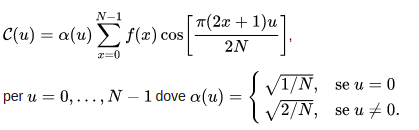

## **2D DCT Formula**

> For u, v = 0, 1, 2, ..., N-1 and α (u), α (v) defined as in the case 1D, we have that:
>
>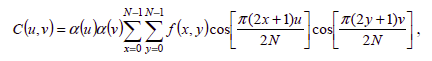
>
>E la sua inversa è definita come:
>
>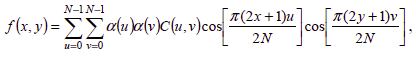

##**Description and application**

###Description
> DCT is used in the compression of lossy digital images. For example, the JPEG algorithm is based on the discrete transform of the two-dimensional cosine, which is applied on blocks of 8x8 pixels where the results are calculated and compressed.
>
> The digital images tend to have very similar neighboring pixels and those are redundant information and, as previously mentioned, the DCT allows us not to consider this information, allowing us to study only uncorrelated values ​​and therefore codifiable independently.

###Application
> In a similar way to the discrete Fourier transform, the DCT transforms a signal or an image from the space domain to the frequency domain, furthermore the DCT can approximate the lines with fewer coefficients well and helps to separate the image into parts of different importance compared to the visual quality of the image.
>
> By dividing the image into blocks of pixels and observing the harmonics in each block we have that, as a result in the analysis, we have a matrix of coefficients where, moving downwards and to the right, we find the coefficients with increasingly higher frequency components. We can compress an image by masking and truncating the coefficients at frequencies higher than those of interest to us.
>
>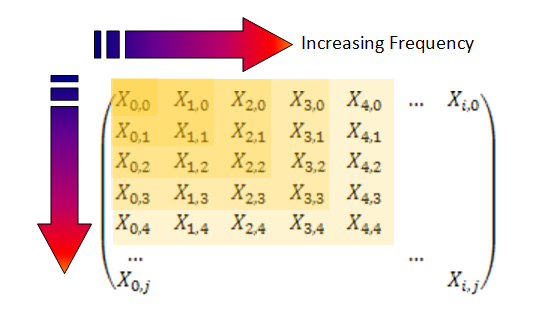

### Severability
> One of the properties of the two-dimensional DCT is that it is separable, that is, it can be separated into a pair of 1D DCTs.
Basically, to obtain the 2D DCT of a block, a 1D DCT is first performed on the rows and then another 1D DCT is performed on the columns of the resulting block.
The same goes for its inverse.

###Compression
> Using a DCT transform the image is shifted in the frequency domain and, depending on the required compression, the higher frequency coefficients of the signal are masked and removed (the digital equivalent of applying an analog low pass filter). When the image is recreated using the truncated coefficients the higher frequency components are not present.

### DCT and DFT comparison
>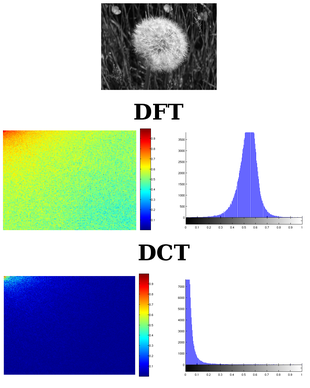
>
>
> As we can see, the DFT spectrum is more widespread than the DCT spectrum and the DCT concentrates information in the low frequencies.

## **Using 2D DFT to Compress a Lossy JPEG Image (block-based implementation)**


Imports
-------

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft
import os

from skimage.color import rgb2gray
from scipy.fftpack import dct, idct
from matplotlib import colors
from cv2 import imread, imwrite

Definition of 2D DCT and its inverse
--------------------------------------------



In [6]:
# Discrete cosine transform
# Work first along the lines and then along the columns of the image / portion of the image passed as an argument
def dct2(x):
    y = dct(dct(x, axis=0, norm='ortho'), axis=1, norm='ortho')
    return y

# Inverse of the discrete transform of the cosine
# Work first along the lines and then along the columns of the image / portion of the image passed as an argument
def idct2(y):
    x = idct(idct(y, axis=0, norm='ortho'), axis=1, norm='ortho')
    return x

Upload image
-------------------------

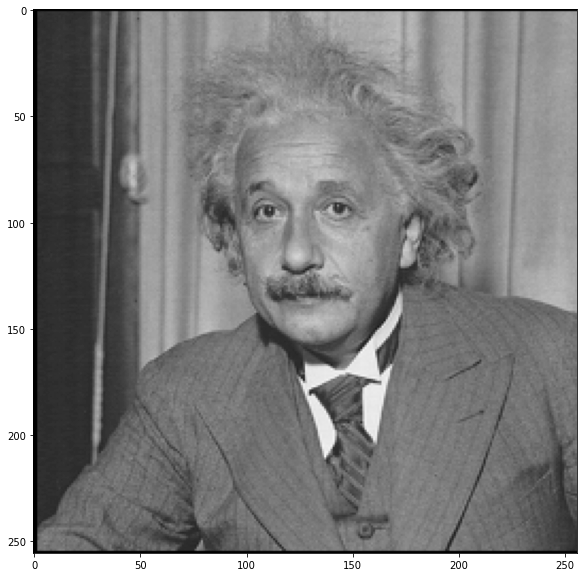

In [7]:
# I load the image and plot it to verify correct loading
img = rgb2gray(imread('einstein.jpeg').astype(float))
plt.figure(figsize = (10,10))
plt.imshow(img, cmap='gray')

Computation of the 2D DCT
--------------------

In [8]:
# Extract the height and width of the uploaded image
imgSize = img.shape

# I declare a matrix of 0
DCT = np.zeros(imgSize)

# I perform the discrete cosine transform for each 8x8 block of the image
for i in np.arange(0, imgSize[0], 8):
    for j in np.arange(0, imgSize[1], 8):
        DCT[i:(i+8), j:(j+8)] = dct2(img[i:(i+8), j:(j+8)])

Visualization of the 2D DCT application
----------------------------------------------

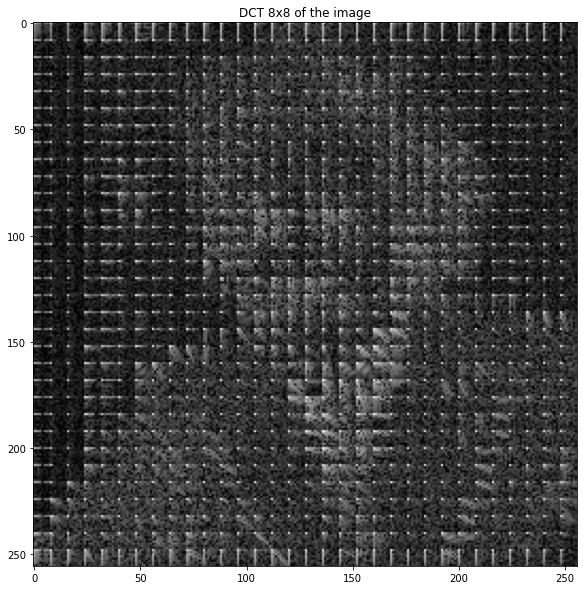

In [9]:
# I plot the result of applying the DCT on all blocks of the image
# What I see are all the coefficients that make up the image
plt.figure(figsize = (10,10))
plt.title("DCT 8x8 of the image")
plt.imshow(np.log10(1 + abs(DCT)), cmap='gray')

Energy display in an 8x8 block
---------------------------------------------

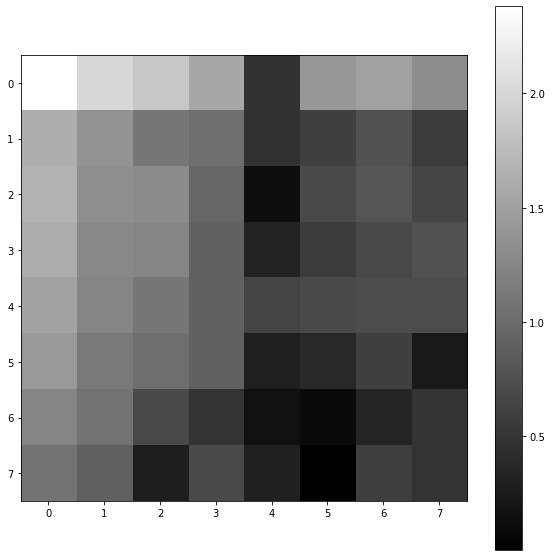

In [10]:
pos = 0 # Indicates the starting position for the 8x8 block plot, modify to marry block
plt.figure(figsize = (10,10))
plt.imshow(np.log10(1 + abs(DCT[pos:pos+8, pos:pos+8])), cmap='gray')
plt.colorbar()

Explanation of energy compaction
--------------------------------------

The effectiveness of a transform can be directly measured by its ability to compress the input data into the fewest possible number of coefficients. This allows you to discard coefficients with relatively small amplitudes without introducing visual distortion in the reconstructed image.

The discrete transform of the cosine has a very effective energy compaction property, that is, it concentrates most of the energy in the first coefficients of the transform.
Let's take this input matrix M for example

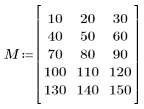

Applying the DCT to M the result is the following matrix Mt

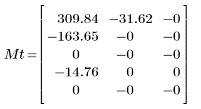

An image has its energy distributed among all the various pixels, by applying the DCT the energy will usually be redistributed in the upper left corner.
In fact, the resulting matrix shows that most of the energy, correlated to the coefficient values, is concentrated in the first elements.



Visualization of the application of the 2D DCT after applying the threshold
---------------------------------------------------------------------

8.31756591796875 % coefficients left after applying the threshold


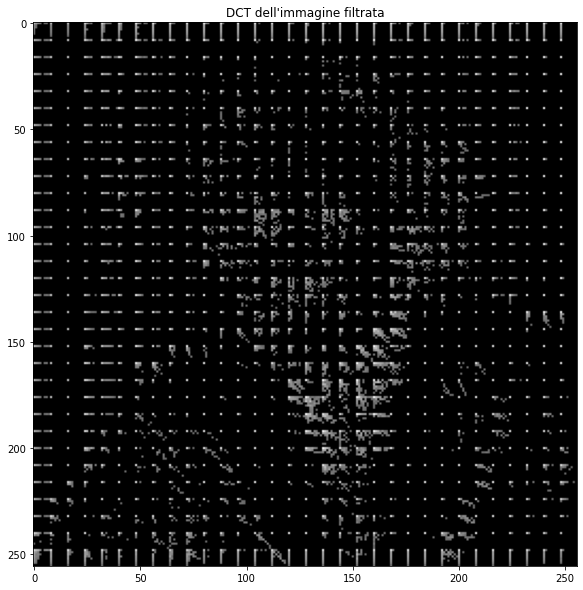

In [11]:
# The more the threshold is increased, the more the percentage of coefficients that I can keep decreases and therefore the loss of information increases
soglia = 20  # Change the value to change the compression level

# Multiplication between the matrix of the cosine transform and the boolean matrix given by the condition.
# The resulting matrix will be an matrix where only the values corresponding to the will be kept
# True position, values that correspond to a False position will be cleared.
dctFiltered = DCT * (abs(DCT) > soglia)

# I plot the 8x8 DCT of the image after filtering it
plt.figure(figsize = (10,10))
plt.title("DCT dell'immagine filtrata")
plt.imshow(np.log10(1 + abs(dctFiltered)), cmap='gray')

# Calculate the percentage of coefficients left after applying the threshold
percentCoeff = (np.sum(dctFiltered != 0.0) / (imgSize[0]*imgSize[1])) * 100
print(percentCoeff,"% coefficients left after applying the threshold")

Explanation of the threshold
------------------------


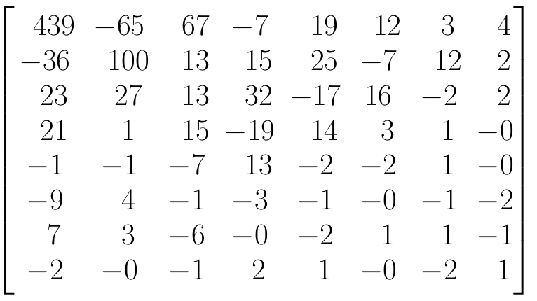

The image above shows an 8x8 matrix obtained by calculating the DCT of an 8x8 block of the matrix of an image.
The elements in the upper left are those that correspond to low frequencies while those in the lower right correspond to the high frequencies. In the low frequencies the values are large, vice versa in the high frequencies the values are small. So to decide the degree of compression I will apply a certain threshold that will be used to eliminate the high frequencies by setting the corresponding coefficients equal to zero. The higher the threshold, the more the coefficients are discarded and the greater the image compression (therefore the loss of information will be greater).

Visualization of the energy of an 8x8 block after applying the threshold
---------------------------------------------

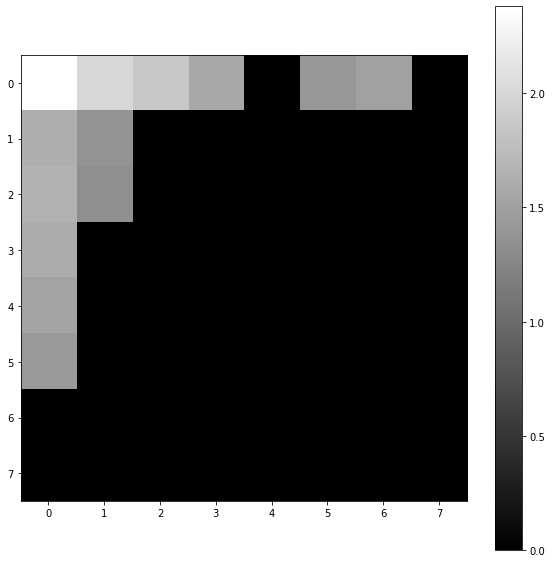

In [12]:
pos = 0 # Indicates the starting position for the 8x8 block plot, modify to marry block
plt.figure(figsize = (10,10))
plt.imshow(np.log10(1 + abs(dctFiltered[pos:pos+8, pos:pos+8])), cmap='gray')
plt.colorbar()

Computation of the inverse of the 2D DCT (to obtain the compressed image)
---------------------------------------------------------------------



In [13]:
# Declare array of 0 that will contain the compressed image
imgDCT = np.zeros(imgSize)

# I apply the DCT inverse to each 8x8 block of the filtered DCT to get the compressed image
for i in np.arange(0, imgSize[0], 8):
    for j in np.arange(0, imgSize[1], 8):
        imgDCT[i:(i+8), j:(j+8)] = idct2(dctFiltered[i:(i+8), j:(j+8)])

Comparison of the original image with the compressed one
------------------------------------------------------

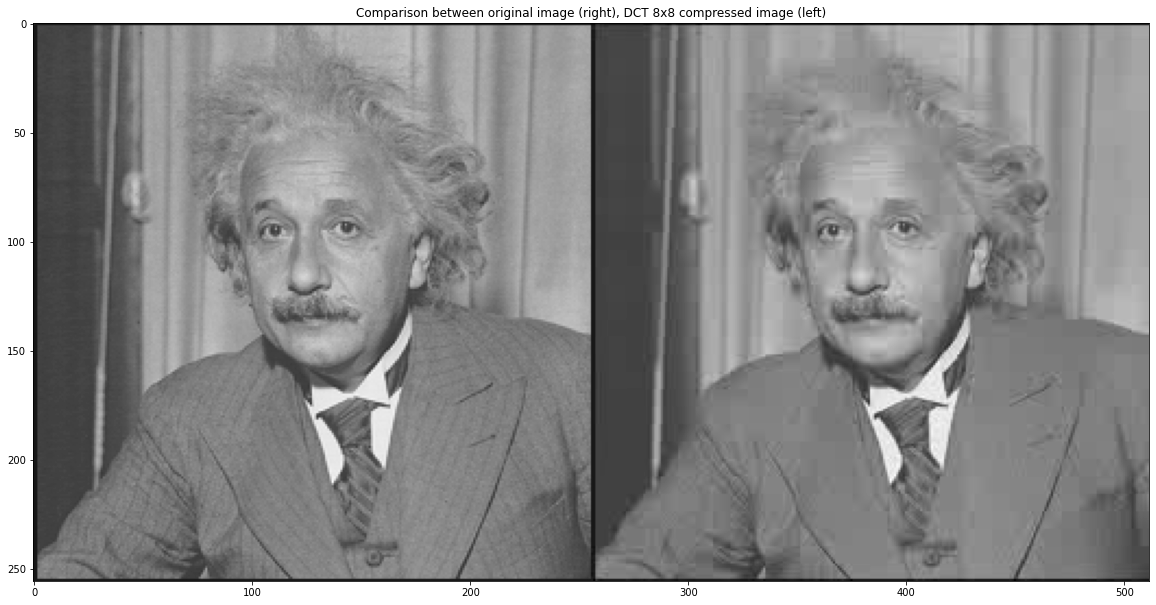

In [14]:
imgComparison = np.concatenate((img, imgDCT), axis=1)
plt.figure(figsize=(20,20))
plt.title("Comparison between original image (right), DCT 8x8 compressed image (left)")
plt.imshow(imgComparison, cmap='gray')
plt.show()

For demonstration purposes I print the dimensions of the images to compare them

In [15]:
# Auxiliary function to return the size of the file passed as an argument
def getSize(filename):
    st = os.stat(filename)
    return st.st_size

# Save the compressed image
imwrite('./imgCompressed.jpeg', imgDCT)

# Change to appropriate names for correct operation
print("Original Image Size:", str(getSize("einstein.jpeg")), "bytes") 
print("\nCompressed Image Size:", str(getSize("imgCompressed.jpeg")), "bytes")

Original Image Size: 42650 bytes

Compressed Image Size: 11468 bytes


## **Conclusions**

After having divided the image into 8x8 blocks and once the DCT has been applied to all the image blocks, having chosen a threshold capable of not considering everything under it to adjust the compression of the image, we can see how the transformation, after filtering, is more empty in proportion to the previously chosen threshold. This is because the coefficients below have been cleared.
The resulting compressed image reflects what we expect from such an application, ie a lighter and therefore compressed image but with a loss of information that increases as the threshold value increases.